In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sn

In [17]:
df = pd.read_csv('Weather Dataset.csv')
#handling missing,duplicate and incorrect data
df.drop_duplicates(inplace=True)
df.sort_values(by=['Formatted Date'],ascending=True,inplace=True)
key = -2000
df = df[~df.isin([key]).any(axis=1)]

<Figure size 1200x600 with 0 Axes>

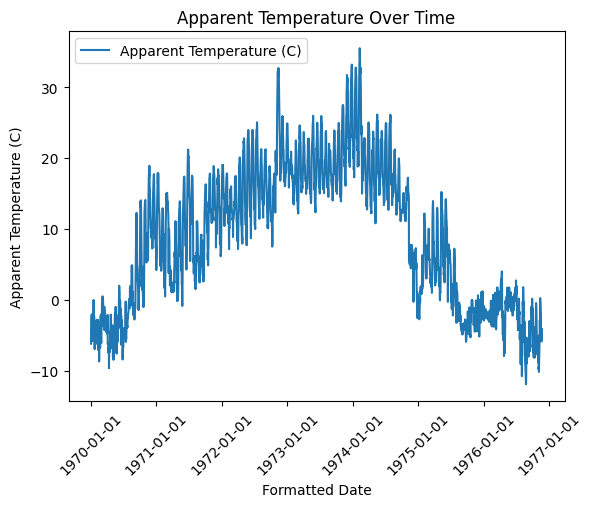

In [18]:
plt.figure(figsize=(12, 6))
df.plot(x='Formatted Date',y='Apparent Temperature (C)',kind='line')
plt.xlabel('Formatted Date')
plt.ylabel('Apparent Temperature (C)')
plt.title('Apparent Temperature Over Time')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

Text(0, 0.5, 'Apparent Temperature (C)')

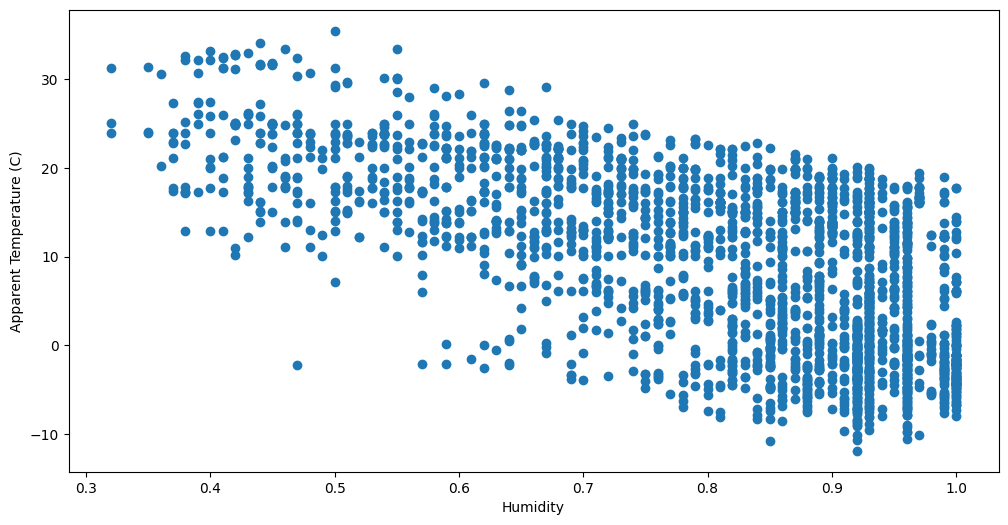

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df['Humidity'],y=df['Apparent Temperature (C)'])
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')

(array([ 52., 343., 440., 275., 239., 495., 408., 202.,  33.,  30.]),
 array([-11.91111111,  -7.17055556,  -2.43      ,   2.31055556,
          7.05111111,  11.79166667,  16.53222222,  21.27277778,
         26.01333333,  30.75388889,  35.49444444]),
 <BarContainer object of 10 artists>)

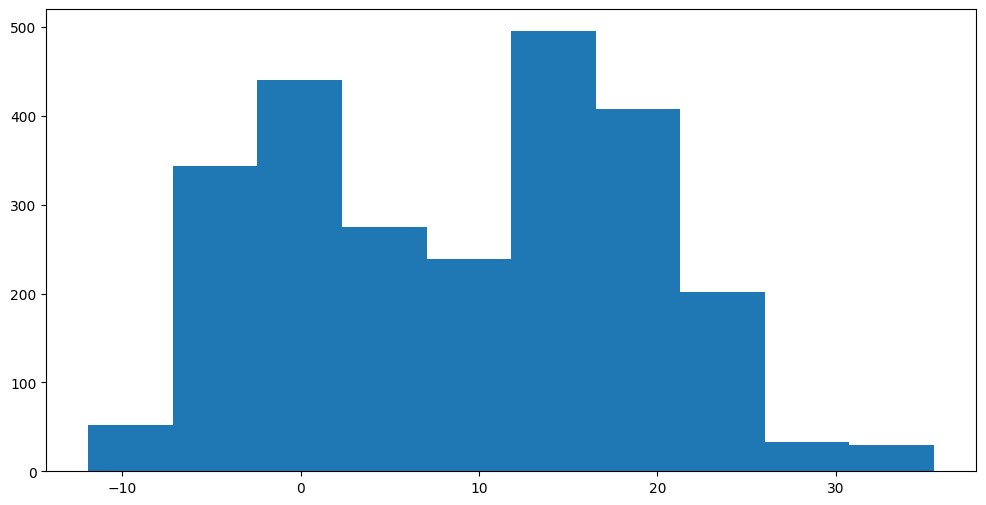

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(df['Apparent Temperature (C)'],bins=10)

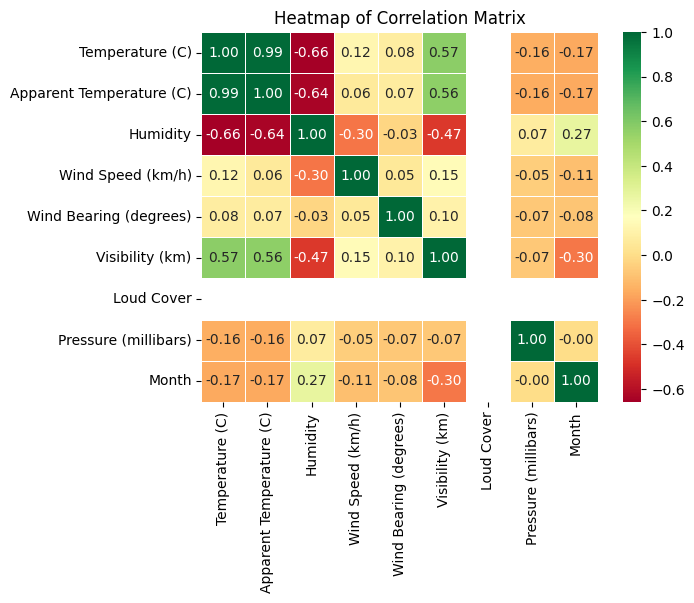

In [7]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f %z', errors='coerce',utc=True)
df['Month']=df['Formatted Date'].dt.month
numeric_df = df.select_dtypes(include=[np.number])
cormat=numeric_df.corr()
sn.heatmap(cormat, annot=True, cmap='RdYlGn', linewidths=0.5, fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()